#### Problem - Tutorial 3: Regression

<table>
  <tr><td>
    <img src="https://brokeassstuart.com/wp-content/pictsnShit/2019/07/inside-airbnb-1263x560.jpg"
         alt="Bank Note " width="600">
  </td></tr>
  <tr><td></td></tr>
  <tr><td>
  <img src="https://miro.medium.com/max/593/1*pfmeGgGM5sxmLBQ5IQfQew.png"
         alt="Matrix" width="600">
  <tr><td></td></tr>
  <tr><td>Can we predict AirBnB prices in SF ...</td></tr>
</table>

source: Databricks Learning Academy MLflow Course

Refactored code to modularize it

While iterating or build models, data scientists will often create a base line model to see how the model performs.
And then iterate with experiments, changing or altering parameters to ascertain how the new parameters or
hyper-parameters move the metrics closer to their confidence level.

This is our base line model using RandomForestRegressor model to predict AirBnb house prices in SF.
Given 22 features, can we predict what the next house price will be?

We will compute standard evalution metrics and log them.

Aim of this module is:

1. Introduce tracking ML experiments in MLflow
2. Log a base experiment and explore the results in the UI
3. Record parameters, metrics, and a model

Some Resources:
* https://mlflow.org/docs/latest/python_api/mlflow.html
* https://www.saedsayad.com/decision_tree_reg.htm
* https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
* https://towardsdatascience.com/explaining-feature-importance-by-example-of-a-random-forest-d9166011959e
* https://seaborn.pydata.org/tutorial/regression.html

In [0]:
%run ./setup/class_setup

Declared various Utitily class utility methods: 
 Declared load_data( path:file_name ) for data files 
 Declared plot_graphs( ... ) for ploting artifacts 
 Declared get_mlflow_directory_path for mlruns path 
 Declared get_temporary_directory_path( ... ) temporary artifact files 
 Declared plot_residual_graphs( ... ) for plotting residues 
 Declared print_pandas_dataset( name:String ) to print Pandas dataFrame

Declared RandomForestRegress Model Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...} returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RandomForestClassifierModel Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared params() returns existing Random Forest Model's init parameters. 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RandomForestModel Base Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

Declared RFFExperimentModel Extended Class with methods: 
 Declared model() returns existing instance of Random Forest Model 
 Declared new_instance(params={...}) returns a new instance of RandomForestClassifierModel 
 Declared mlflow_run(DataFrame, run_name="name") returns experiment_ID, run_ID

In [0]:
# load the data
dataset = Utils.load_data("https://github.com/dmatrix/tutorials/raw/master/mlflow/labs/data/airbnb-cleaned-mlflow.csv")
dataset.head()

Out[12]:

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
0,1.0,0,0,37.769310,-122.433856,0,0,3.0,1.0,1.0,2.0,0,1.0,127.0,97.0,10.0,10.0,10.0,10.0,10.0,10.0,170.0
1,2.0,1,1,37.745112,-122.421018,0,0,5.0,1.0,2.0,3.0,0,30.0,112.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,235.0
2,10.0,2,0,37.766690,-122.452505,0,1,2.0,4.0,1.0,1.0,0,32.0,17.0,85.0,8.0,8.0,9.0,9.0,9.0,8.0,65.0
3,4.0,3,2,37.730746,-122.448409,1,1,1.0,2.0,1.0,1.0,0,3.0,76.0,95.0,9.0,9.0,10.0,10.0,9.0,9.0,60.0
4,10.0,2,0,37.764872,-122.451828,1,1,2.0,4.0,1.0,1.0,0,32.0,7.0,91.0,9.0,9.0,9.0,9.0,9.0,9.0,65.0


In [0]:
dataset.describe()

Out[13]:

,host_total_listings_count,neighbourhood_cleansed,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price
count,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000,4707.000000
mean,5.973019,11.582749,8.316550,37.763363,-122.432648,2.411302,0.445932,3.376673,1.358084,1.431273,1.865519,0.032292,7.100064,50.621840,95.898874,9.814107,9.702996,9.900361,9.894200,9.665604,9.543658,198.085617
std,19.851679,9.589187,6.651043,0.022808,0.026865,4.333174,0.532215,2.166230,1.229827,1.381571,1.533163,0.279294,13.422551,68.679245,5.080354,0.475123,0.605048,0.377960,0.366265,0.596715,0.630332,147.134192
min,0.000000,0.000000,0.000000,37.704783,-122.511500,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,10.000000
25%,1.000000,4.000000,2.000000,37.747890,-122.445374,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,6.000000,95.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,100.000000
50%,2.000000,8.000000,7.000000,37.762951,-122.428226,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,2.000000,23.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,150.000000
75%,3.000000,18.000000,13.000000,37.780932,-122.412364,1.500000,1.000000,4.000000,1.500000,2.000000,2.000000,0.000000,4.000000,67.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,249.000000
max,964.000000,35.000000,27.000000,37.810306,-122.370427,24.000000,2.000000,16.000000,15.000000,15.000000,15.000000,4.000000,365.000000,568.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,995.000000


----------------------------------------------------------------------------------------------------
Inside MLflow Experiment with 75 trees Run with run_id 49de618e233b419f89533e59f96dc389 and experiment_id 2387317862617849
 mse: 6647.9080191611
 rmse: 81.53470438507213
 mae: 52.32708488770738
 R2 : 0.6753910952554966
MLflow Run completed with run_id 49de618e233b419f89533e59f96dc389 and experiment_id 2387317862617849
----------------------------------------------------------------------------------------------------

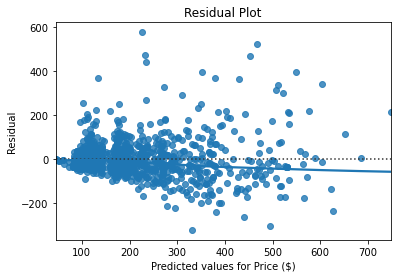

In [0]:
# To try different experiment runs, each with its own instance of model with the supplied parameters, 
# add more parameters to this dictionary list to experiment different parameters and their
# effects on evaluation metrics.
params_list = [ {"n_estimators": 75,"max_depth": 6, "random_state": 42}]
# run these experiments, each with its own instance of model with the supplied parameters.
for params in params_list:
  rfr = RFFExperimentModel.new_instance(params)  
  experiment = "Experiment with {} trees".format(params['n_estimators'])
  (experimentID, runID) = rfr.mlflow_run(dataset, r_name=experiment)
  print("MLflow Run completed with run_id {} and experiment_id {}".format(runID, experimentID))
  print("-" * 100)

#### Lab/Homework for Some Experimental runs

 1. Consult [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) documentation to see what hyperparameters you can specify
  * Change or add parameters, such as depth of the tree
 2. Change or alter the range of runs and increments of n_estimators
 3. Use [scikit-learn cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) to see any difference in metrics